<h2>Useamman selittäjän lineaarinen regressio</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Luetaan aineisto (hinta ilmoitettu tuhansina euroina)
df=pd.read_excel('http://taanila.fi/mokki.xlsx')
df

,nro,ranta,pinta-ala,sähkö,hinta
0,1,30,50,0,95
1,2,35,42,0,95
2,3,40,25,1,80
3,4,50,30,1,100
4,5,55,45,0,135
5,6,60,24,1,100
6,7,60,60,1,210
7,8,70,34,1,160
8,9,80,32,0,150
9,10,85,28,0,150


C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


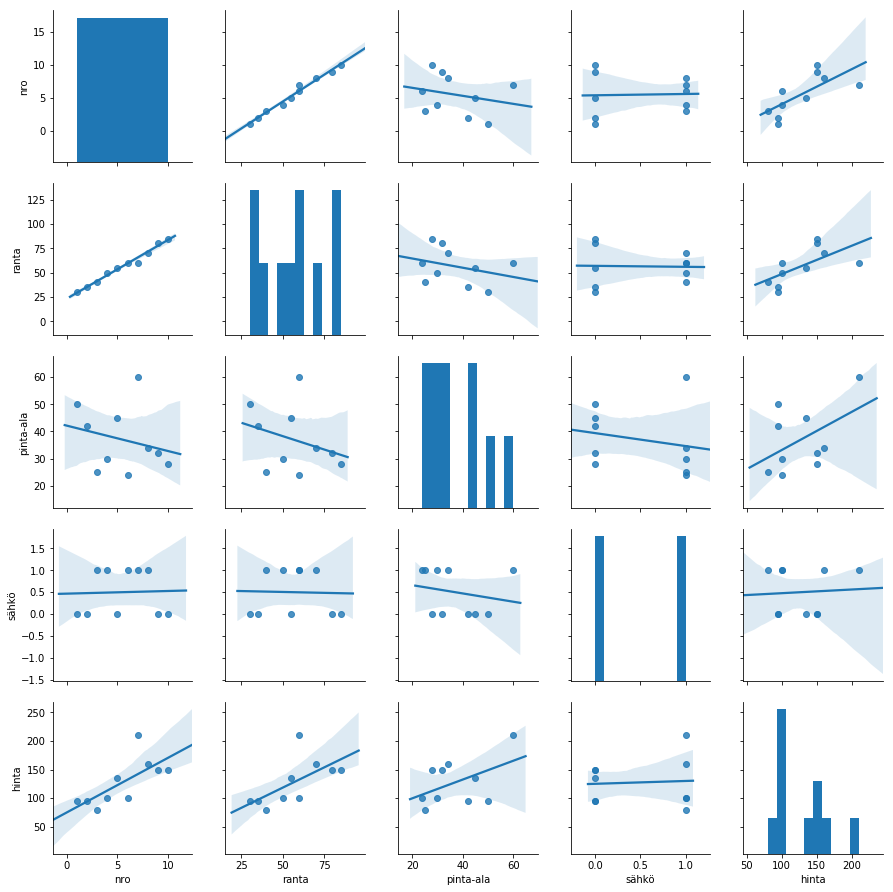

In [3]:
#Riippuvuuksien tarkastelua hajontakaavioina:
sns.pairplot(df, kind='reg')

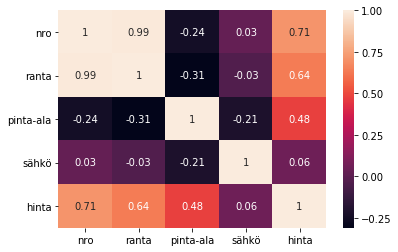

In [4]:
#Riippuvuuksien tarkastelua korrelaatiokertoimien avulla:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
#X=features, y=target
X=df[['ranta', 'pinta-ala', 'sähkö']]
y=df['hinta']

In [6]:
#Valitse malli ja sovita (fit) malli
from sklearn.linear_model import LinearRegression

malli=LinearRegression()
malli.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
malli.intercept_ #Regressiosuoran vakiotermi

-96.94145434036429

In [8]:
malli.coef_ #Regressiosuoran kulmakerroin

array([ 1.9750098 ,  2.77578415, 20.29877373])

In [9]:
malli.score(X,y) #Mallin selityskerroin

0.9819136190845801

Text(0, 0.5, 'Poikkeama todellisesta')

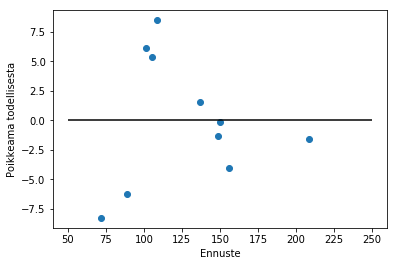

In [10]:
#Mallin virhetermit:
plt.scatter(malli.predict(X), malli.predict(X)-y)

#Vaakaviiva nollapoikkeaman kohdalle:
plt.hlines(y=0,xmin=50,xmax=250)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Text(0, 0.5, 'Ennuste')

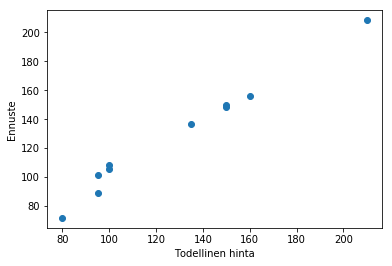

In [11]:
#Todellisen hinnan ja ennustamallin antamien ennusteiden vastaavuus:
plt.scatter(df['hinta'], malli.predict(X))

plt.xlabel('Todellinen hinta')
plt.ylabel('Ennuste')

In [12]:
#Ennuste uudelle aineistolle:

Xuudet=pd.read_excel('http://taanila.fi/mokkinew.xlsx')

Xuudet['Hintaennuste']=malli.predict(Xuudet)
Xuudet

,ranta,pinta-ala,sähkö,Hintaennuste
0,100,90,1,370.678873
1,60,56,1,197.301820
2,30,25,0,31.703444
3,50,30,0,85.082560


In [13]:
#Perinteisempi regressio-statistiikka statsmodels-kirjastosta
import statsmodels.api as sm

X = sm.add_constant(X)
malli_sm = sm.OLS(y, X)
results = malli_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  hinta   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     108.6
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           1.29e-05
Time:                        13:36:07   Log-Likelihood:                -30.630
No. Observations:                  10   AIC:                             69.26
Df Residuals:                       6   BIC:                             70.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -96.9415     12.767     -7.593      0.0

C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
